In [49]:
import pandas as pd
import numpy as np
import nltk 
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.shape

(50000, 2)

Text(0.5, 1.0, 'Sentiment Distribution')

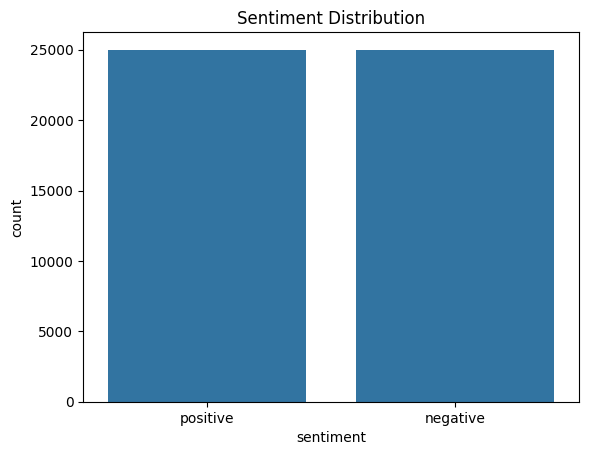

In [6]:
sns.countplot(x='sentiment',data=df)
plt.title('Sentiment Distribution')

In [7]:
for i in range(5):
    print('Review: ',[i])
    print(df['review'].iloc[i], "\n")
    print('Sentiment: ',df['sentiment'].iloc[i])

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [8]:
def count_words(text):
    words = text.split()  # Split the text into words based on spaces
    return len(words)

In [9]:
df['word count']=df['review'].apply(count_words)

In [10]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


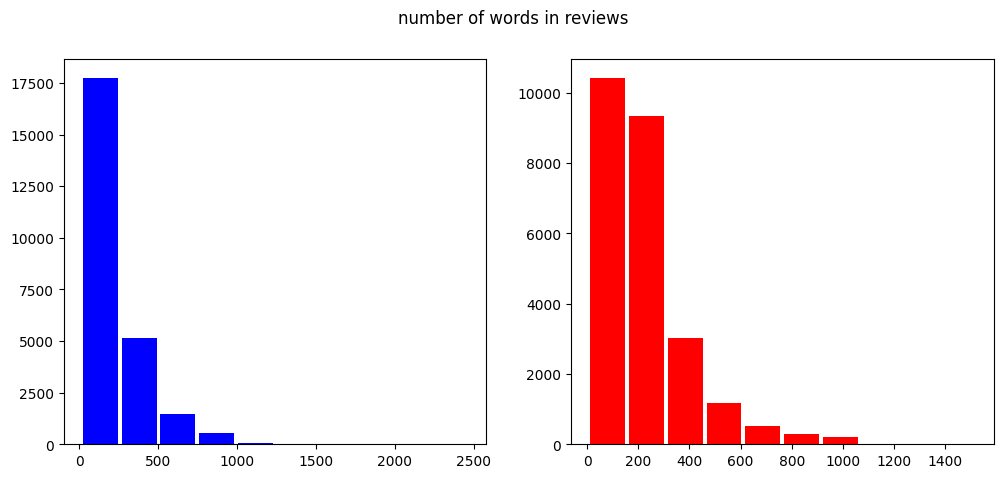

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(df[df['sentiment']=='positive']['word count'],label='positive',color='blue',rwidth=0.9);
ax[1].hist(df[df['sentiment']=='negative']['word count'],label='negative',color='red',rwidth=0.9);
fig.suptitle("number of words in reviews")
plt.show()

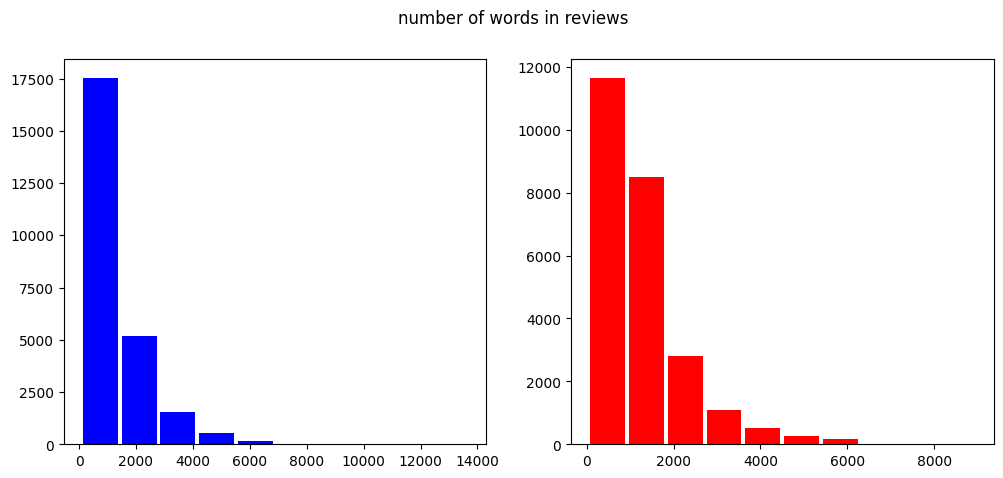

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(df[df['sentiment']=='positive']['review'].str.len(),label='positive',color='blue',rwidth=0.9);
ax[1].hist(df[df['sentiment']=='negative']['review'].str.len(),label='negative',color='red',rwidth=0.9);
fig.suptitle("number of words in reviews")
plt.show()

In [13]:
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
df

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230
...,...,...,...
49995,I thought this movie did a down right good job...,1,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,112
49997,I am a Catholic taught in parochial elementary...,0,230
49998,I'm going to have to disagree with the previou...,0,212


In [19]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [22]:
df['review'] = df['review'].apply(data_processing)

In [23]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [24]:
df.review = df['review'].apply(lambda x: stemming(x))

In [25]:
pos_reviews =  df[df.sentiment == 1]

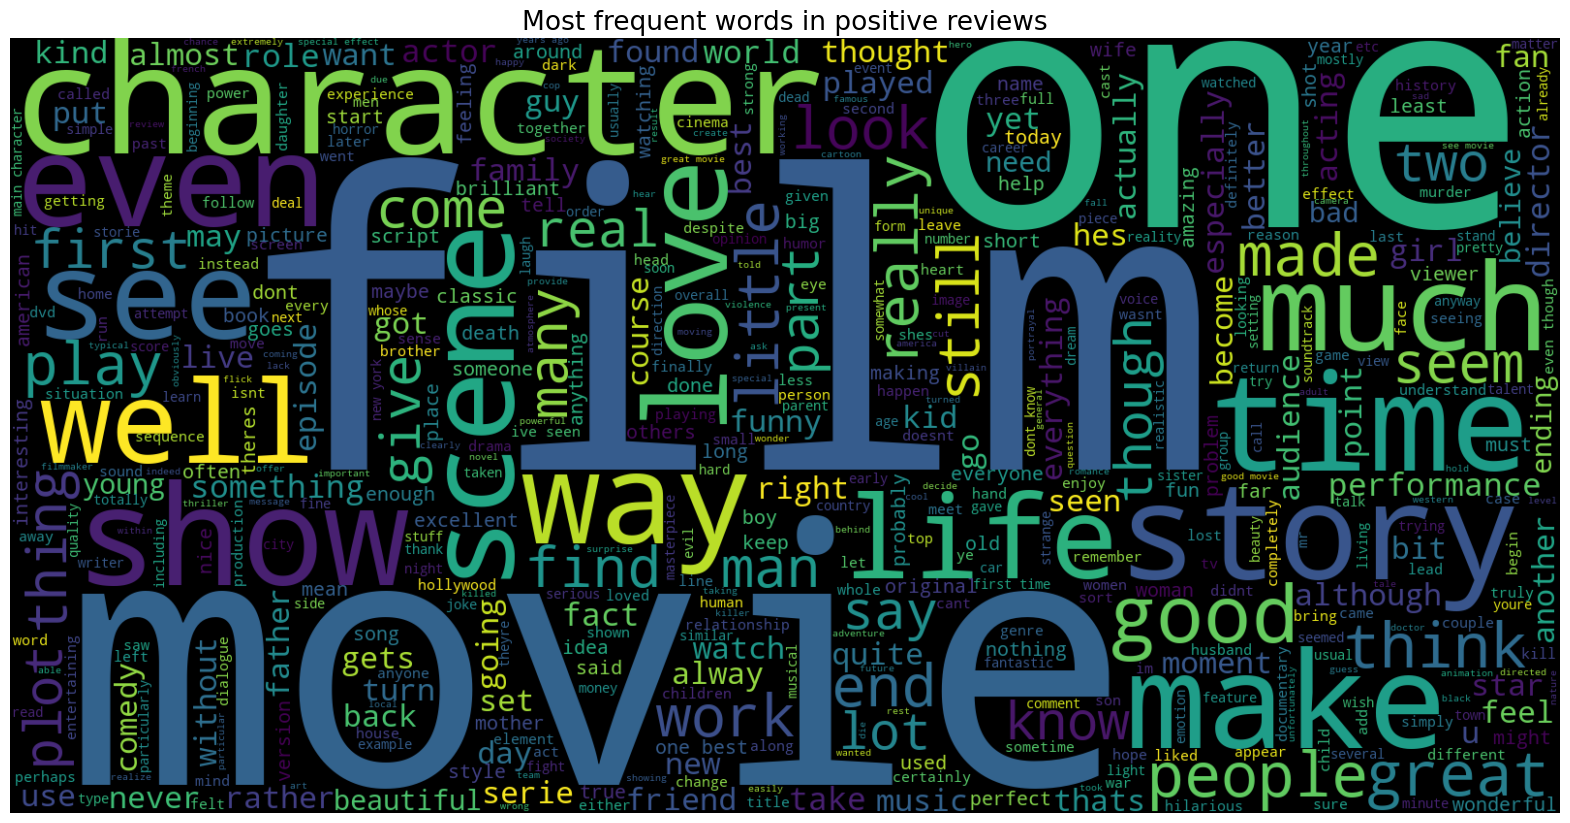

In [31]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [35]:
neg_reviews =  df[df.sentiment == 0]

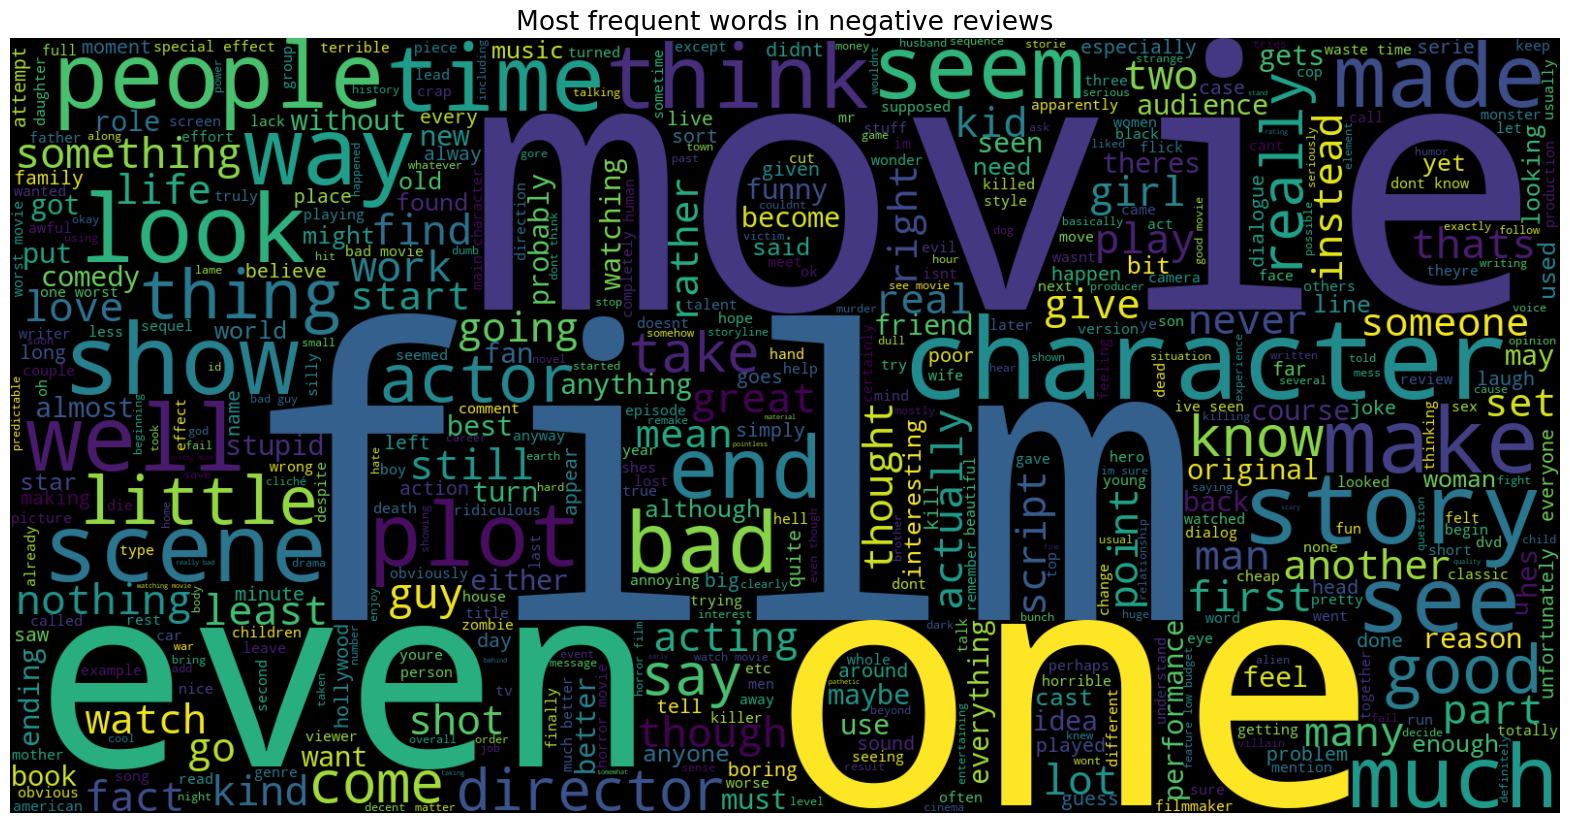

In [36]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [38]:
X=df['review']
y=df['sentiment']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
vect = TfidfVectorizer()

In [40]:
X_train_tfidf = vect.fit_transform(X_train)
X_test_tfidf = vect.transform(X_test)

In [44]:
model=LogisticRegression()
model.fit(X_train_tfidf,y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(X_test_tfidf)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [46]:
print("Confusion Matrix:")
d=confusion_matrix(y_test, y_pred)
print(d)

Confusion Matrix:
[[4375  586]
 [ 446 4593]]


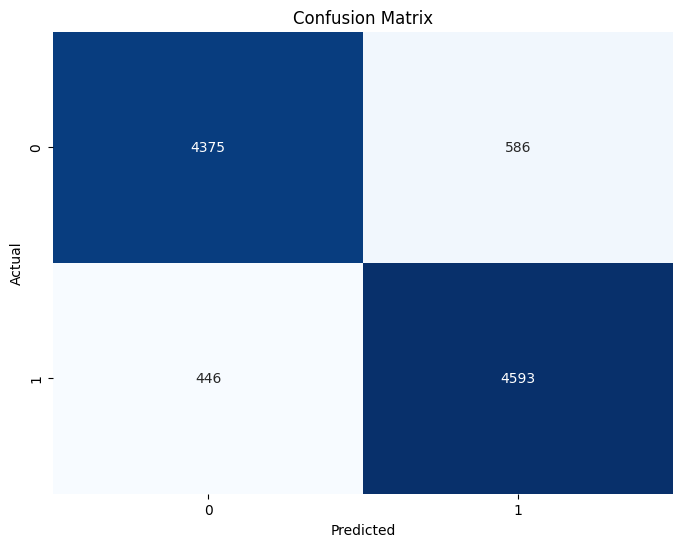

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(d, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
